In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import date, time, timedelta
from datetime import datetime as dt

from math import sqrt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline

In [32]:
df = pd.read_csv('business_project_fabian_paul_regression_input.csv', sep=';')
df.head()

,publisher,date,visits_ges,visits_mob,visits_stationary,anz_gesellschaft,anz_politik,anz_sport,anz_wirtschaft,anz_feuilleton,...,pct_Olympia,pct_RKI,pct_Hessen,pct_EZB,pct_Bundeswehr,pct_Omikron-Variante,pct_ISIN_DE0008469008,pct_Kirche,pct_Pandemie,pct_China
0,FAZ.NET,01.01.2022,2241090,1822260,418830,17,19,10,13,8,...,0.012346,0.012346,0.000000,0.049383,0.012346,0.012346,0.012346,0.012346,0.024691,0.037037
1,FAZ.NET,02.01.2022,2358585,1848733,509852,12,26,11,13,9,...,0.011364,0.022727,0.000000,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.022727
2,FAZ.NET,03.01.2022,2316463,1651514,664949,16,32,17,21,13,...,0.015385,0.030769,0.000000,0.000000,0.000000,0.030769,0.000000,0.007692,0.015385,0.000000
3,FAZ.NET,04.01.2022,2418515,1644519,773996,28,39,19,21,12,...,0.000000,0.019737,0.006579,0.006579,0.013158,0.039474,0.000000,0.000000,0.000000,0.013158
4,FAZ.NET,05.01.2022,2476169,1768493,707676,6,9,5,8,5,...,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000


In [33]:
list(df.columns)

['publisher',
 'date',
 'visits_ges',
 'visits_mob',
 'visits_stationary',
 'anz_gesellschaft',
 'anz_politik',
 'anz_sport',
 'anz_wirtschaft',
 'anz_feuilleton',
 'anz_rhein-main',
 'anz_stil',
 'anz_technik-motor',
 'anz_finanzen',
 'anz_wissen',
 'anz_karriere-hochschule',
 'anz_reise',
 'anz_no_ressort(newsagency)',
 'anz_newsletter-fruehdenker',
 'anz_fotografie',
 'anz_das-beste-von-fplus',
 'pct_gesellschaft',
 'pct_politik',
 'pct_sport',
 'pct_wirtschaft',
 'pct_feuilleton',
 'pct_rhein-main',
 'pct_stil',
 'pct_technik-motor',
 'pct_finanzen',
 'pct_wissen',
 'pct_karriere-hochschule',
 'pct_reise',
 'pct_no_ressort(newsagency)',
 'pct_newsletter-fruehdenker',
 'pct_fotografie',
 'pct_das-beste-von-fplus',
 'anz_news_agency',
 'anz_news_agency_curated',
 'anz_print_Sunday',
 'anz_print_weekday',
 'anz_online',
 'anz_print_magazine',
 'pct_news_agency',
 'pct_news_agency_curated',
 'pct_print_Sunday',
 'pct_print_weekday',
 'pct_online',
 'pct_print_magazine',
 'sunday',
 'mo

In [205]:
col_names = ['publisher',
             'date',
             'visits_ges',
             'visits_mob',
             'visits_stationary',
             'anz_gesellschaft',
             'anz_politik',
             'anz_sport',
             'anz_wirtschaft',
             'anz_feuilleton',
             'anz_rheinmain',
             'anz_stil',
             'anz_technikmotor',
             'anz_finanzen',
             'anz_wissen',
             'anz_karrierehochschule',
             'anz_reise',
             'anz_no_ressortnewsagency',
             'anz_newsletterfruehdenker',
             'anz_fotografie',
             'anz_dasbestevonfp',
             'pct_gesellschaft',
             'pct_politik',
             'pct_sport',
             'pct_wirtschaft',
             'pct_feuilleton',
             'pct_rheinmain',
             'pct_stil',
             'pct_technikmotor',
             'pct_finanzen',
             'pct_wissen',
             'pct_karrierehochschule',
             'pct_reise',
             'pct_no_ressortnewsagency',
             'pct_newsletterfruehdenker',
             'pct_fotografie',
             'pct_dasbestevonfp',
             'anz_news_agency',
             'anz_news_agency_curated',
             'anz_print_Sunday',
             'anz_print_weekday',
             'anz_online',
             'anz_print_magazine',
             'pct_news_agency',
             'pct_news_agency_curated',
             'pct_print_Sunday',
             'pct_print_weekday',
             'pct_online',
             'pct_print_magazine',
             'sunday',
             'monday',
             'tuesday',
             'wednesday',
             'thursday',
             'friday',
             'saturday',
             'anz_21_06',
             'anz_06_11',
             'anz_11_16',
             'anz_16_21',
             'pct_21_06',
             'pct_06_11',
             'pct_11_16',
             'pct_16_21',
             'anz_free',
             'pct_paid',
             'anz_opinion',
             'pct_opinion',
             'anz_3',
             'anz_2',
             'anz_1',
             'anz_6',
             'anz_7',
             'anz_no_info',
             'anz_5',
             'anz_8',
             'anz_4',
             'anz_9',
             'anz_12',
             'anz_11',
             'anz_10',
             'anz_14',
             'anz_13',
             'anz_15',
             'anz_18',
             'anz_21',
             'anz_long_article',
             'pct_3',
             'pct_2',
             'pct_1',
             'pct_6',
             'pct_7',
             'pct_no_info',
             'pct_5',
             'pct_8',
             'pct_4',
             'pct_9',
             'pct_12',
             'pct_11',
             'pct_10',
             'pct_14',
             'pct_13',
             'pct_15',
             'pct_18',
             'pct_21',
             'pct_long_article',
             'anz_top_100_authors_by_publications',
             'pct_top_100_authors_by_publications',
             'kw_anz_top_30_keywords',
             'kw_anz_Coronavirus',
             'kw_anz_SPD',
             'kw_anz_Ukraine',
             'kw_anz_EuropäischeUnion',
             'kw_anz_WladimirPutin',
             'kw_anz_Deutschland',
             'kw_anz_Frankfurt',
             'kw_anz_CDU',
             'kw_anz_Polizei',
             'kw_anz_FAZ',
             'kw_anz_Russland',
             'kw_anz_Bundesregierung',
             'kw_anz_Bundeskanzler',
             'kw_anz_Nato',
             'kw_anz_OlafScholz',
             'kw_anz_FDP',
             'kw_anz_Bundestag',
             'kw_anz_no_info',
             'kw_anz_Frauen',
             'kw_anz_Dollar',
             'kw_anz_Auto',
             'kw_anz_JoeBiden',
             'kw_anz_Staatsanwaltschaft',
             'kw_anz_Twitter',
             'kw_anz_RobertHabeck',
             'kw_anz_USA',
             'kw_anz_Reuters',
             'kw_anz_WolodymyrSelenskyj',
             'kw_anz_UkraineKonflikt',
             'kw_anz_Familie',
             'kw_anz_Berlin',
             'kw_anz_Olympia',
             'kw_anz_RKI',
             'kw_anz_Hessen',
             'kw_anz_EZB',
             'kw_anz_Bundeswehr',
             'kw_anz_OmikronVariante',
             'kw_anz_ISIN_DE0008469008',
             'kw_anz_Kirche',
             'kw_anz_Pandemie',
             'kw_anz_China',
             'kw_pct_top_30_keywords',
             'kw_pct_Coronavirus',
             'kw_pct_SPD',
             'kw_pct_Ukraine',
             'kw_pct_EuropäischeUnion',
             'kw_pct_WladimirPutin',
             'kw_pct_Deutschland',
             'kw_pct_Frankfurt',
             'kw_pct_CDU',
             'kw_pct_Polizei',
             'kw_pct_FAZ',
             'kw_pct_Russland',
             'kw_pct_Bundesregierung',
             'kw_pct_Bundeskanzler',
             'kw_pct_Nato',
             'kw_pct_OlafScholz',
             'kw_pct_FDP',
             'kw_pct_Bundestag',
             'kw_pct_no_info',
             'kw_pct_Frauen',
             'kw_pct_Dollar',
             'kw_pct_Auto',
             'kw_pct_JoeBiden',
             'kw_pct_Staatsanwaltschaft',
             'kw_pct_Twitter',
             'kw_pct_RobertHabeck',
             'kw_pct_USA',
             'kw_pct_Reuters',
             'kw_pct_WolodymyrSelenskyj',
             'kw_pct_UkraineKonflikt',
             'kw_pct_Familie',
             'kw_pct_Berlin',
             'kw_pct_Olympia',
             'kw_pct_RKI',
             'kw_pct_Hessen',
             'kw_pct_EZB',
             'kw_pct_Bundeswehr',
             'kw_pct_OmikronVariante',
             'kw_pct_ISIN_DE0008469008',
             'kw_pct_Kirche',
             'kw_pct_Pandemie',
             'kw_pct_China'
            ]

In [206]:
df.columns = col_names

In [371]:
col_mask = [
             'visits_ges',
#              'visits_mob',
#              'visits_stationary',
#              'anz_gesellschaft',
#              'anz_politik',
#              'anz_sport',
#              'anz_wirtschaft',
#              'anz_feuilleton',
#              'anz_rheinmain',
#              'anz_stil',
#              'anz_technikmotor',
#              'anz_finanzen',
#              'anz_wissen',
#              'anz_karrierehochschule',
#              'anz_reise',
#              'anz_no_ressortnewsagency',
#              'anz_newsletterfruehdenker',
#              'anz_fotografie',
#              'anz_dasbestevonfp',
#              'pct_gesellschaft',
#              'pct_politik',
#              'pct_sport',
#              'pct_wirtschaft',
#              'pct_feuilleton',
#              'pct_rheinmain',
#              'pct_stil',
#              'pct_technikmotor',
#              'pct_finanzen',
#              'pct_wissen',
#              'pct_karrierehochschule',
#              'pct_reise',
#              'pct_no_ressortnewsagency',
#              'pct_newsletterfruehdenker',
#              'pct_fotografie',
#              'pct_dasbestevonfp',
#              'anz_news_agency',
#              'anz_news_agency_curated',
#              'anz_print_Sunday',
#              'anz_print_weekday',
#              'anz_online',
#              'anz_print_magazine',
#              'pct_news_agency',
#              'pct_news_agency_curated',
#              'pct_print_Sunday',
#              'pct_print_weekday',
#              'pct_online',
#              'pct_print_magazine',
#              'sunday',
#              'monday',
#              'tuesday',
#              'wednesday',
#              'thursday',
#              'friday',
#              'saturday',
#              'anz_21_06',
#              'anz_06_11',
#              'anz_11_16',
#              'anz_16_21',
#              'pct_21_06',
#              'pct_06_11',
#              'pct_11_16',
#              'pct_16_21',
#              'anz_free',
             'pct_paid',
#              'anz_opinion',
#              'pct_opinion',
#              'anz_3',
#              'anz_2',
#              'anz_1',
#              'anz_6',
#              'anz_7',
#              'anz_no_info',
#              'anz_5',
#              'anz_8',
#              'anz_4',
#              'anz_9',
#              'anz_12',
#              'anz_11',
#              'anz_10',
#              'anz_14',
#              'anz_13',
#              'anz_15',
#              'anz_18',
#              'anz_21',
#              'anz_long_article',
#              'pct_3',
#              'pct_2',
#              'pct_1',
#              'pct_6',
#              'pct_7',
#              'pct_no_info',
#              'pct_5',
#              'pct_8',
#              'pct_4',
#              'pct_9',
#              'pct_12',
#              'pct_11',
#              'pct_10',
#              'pct_14',
#              'pct_13',
#              'pct_15',
#              'pct_18',
#              'pct_21',
#              'pct_long_article',
#              'anz_top_100_authors_by_publications',
#              'pct_top_100_authors_by_publications',
#              'kw_anz_top_30_keywords',
#              'kw_anz_Coronavirus',
#              'kw_anz_SPD',
#              'kw_anz_Ukraine',
#              'kw_anz_EuropäischeUnion',
             'kw_anz_WladimirPutin',
#              'kw_anz_Deutschland',
#              'kw_anz_Frankfurt',
#              'kw_anz_CDU',
#              'kw_anz_Polizei',
#              'kw_anz_FAZ',
#              'kw_anz_Russland',
#              'kw_anz_Bundesregierung',
#              'kw_anz_Bundeskanzler',
#              'kw_anz_Nato',
#              'kw_anz_OlafScholz',
#              'kw_anz_FDP',
             'kw_anz_Bundestag',
             'kw_anz_no_info',
#              'kw_anz_Frauen',
#              'kw_anz_Dollar',
#              'kw_anz_Auto',
#              'kw_anz_JoeBiden',
#              'kw_anz_Staatsanwaltschaft',
#              'kw_anz_Twitter',
#              'kw_anz_RobertHabeck',
#              'kw_anz_USA',
#              'kw_anz_Reuters',
#              'kw_anz_WolodymyrSelenskyj',
#              'kw_anz_UkraineKonflikt',
#              'kw_anz_Familie',
#              'kw_anz_Berlin',
#              'kw_anz_Olympia',
#              'kw_anz_RKI',
#              'kw_anz_Hessen',
#              'kw_anz_EZB',
#              'kw_anz_Bundeswehr',
#              'kw_anz_OmikronVariante',
#              'kw_anz_ISIN_DE0008469008',
#              'kw_anz_Kirche',
#              'kw_anz_Pandemie',
             'kw_anz_China',
#              'kw_pct_top_30_keywords',
#              'kw_pct_Coronavirus',
#              'kw_pct_SPD',
#              'kw_pct_Ukraine',
#              'kw_pct_EuropäischeUnion',
#              'kw_pct_WladimirPutin',
#              'kw_pct_Deutschland',
#              'kw_pct_Frankfurt',
#              'kw_pct_CDU',
#              'kw_pct_Polizei',
#              'kw_pct_FAZ',
#              'kw_pct_Russland',
#              'kw_pct_Bundesregierung',
             'kw_pct_Bundeskanzler',
#              'kw_pct_Nato',
#              'kw_pct_OlafScholz',
#              'kw_pct_FDP',
#              'kw_pct_Bundestag',
#              'kw_pct_no_info',
#              'kw_pct_Frauen',
#              'kw_pct_Dollar',
#              'kw_pct_Auto',
#              'kw_pct_JoeBiden',
#              'kw_pct_Staatsanwaltschaft',
#              'kw_pct_Twitter',
#              'kw_pct_RobertHabeck',
#              'kw_pct_USA',
#              'kw_pct_Reuters',
#              'kw_pct_WolodymyrSelenskyj',
#              'kw_pct_UkraineKonflikt',
#              'kw_pct_Familie',
#              'kw_pct_Berlin',
#              'kw_pct_Olympia',
#              'kw_pct_RKI',
#              'kw_pct_Hessen',
#              'kw_pct_EZB',
#              'kw_pct_Bundeswehr',
#              'kw_pct_OmikronVariante',
#              'kw_pct_ISIN_DE0008469008',
#              'kw_pct_Kirche',
#              'kw_pct_Pandemie',
#              'kw_pct_China'
            ]

In [372]:
df_short = df[col_mask]

In [416]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('visits_ges ~ pct_paid + kw_anz_WladimirPutin + kw_anz_Bundestag + kw_anz_no_info + kw_anz_China + kw_pct_Bundeskanzler', data=df_short, return_type='dataframe')

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             visits_ges   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     31.77
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.49e-22
Time:                        19:15:50   Log-Likelihood:                -1654.7
No. Observations:                 119   AIC:                             3323.
Df Residuals:                     112   BIC:                             3343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.144e+06    7.9e+04     27.159      0.000    1.99e+06     2.3e+06
pct_paid              6.028e+05   1.63e+05      3.688      0.000    2.79e+05    9.27e+05
kw_anz_WladimirPutin   3.87e+04   4104.197      9.429      0.000    3.06e+04    4.68e+04
kw_anz_Bundestag      -1.75e+04   8660.595     -2.021      0.046   -3.47e+04    -342.027
kw_anz_no_info       -1.961e+04   6369.786     -3.078      0.003   -3.22e+04   -6987.659
kw_anz_China         -4.121e+04   1.69e+04     -2.433      0.017   -7.48e+04   -7652.073
kw_pct_Bundeskanzler   3.86e+06   1.69e+06      2.290      0.024    5.21e+05     7.2e+06
==============================================================================
Omnibus:                        2.206   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                2.082
Skew:                           0.322   Prob(JB):                        0.353
Kurtosis:                       2.923   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption 1: Regression is linear in parameters and correctly specified

- Regression fit: Inspect plot of observed data vs predicted values (points should be symmetric around the line).
- Residual plot: Points should be symmetric around y=0 w/ roughly constant variance. 
- Look carefully for evidence of a "bowed" pattern, indicating that the model makes systematic errors whenever it is making unusually large or small predictions.
- Q-Q plot: Look for the middle section of dots to be very close to the diagonal red line. 
Use the chart below as a reference for interpretation.

In [374]:
X = df_short.drop(['visits_ges'], axis=1)
y = df_short['visits_ges']

In [375]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X, y)

0.6298904253678634

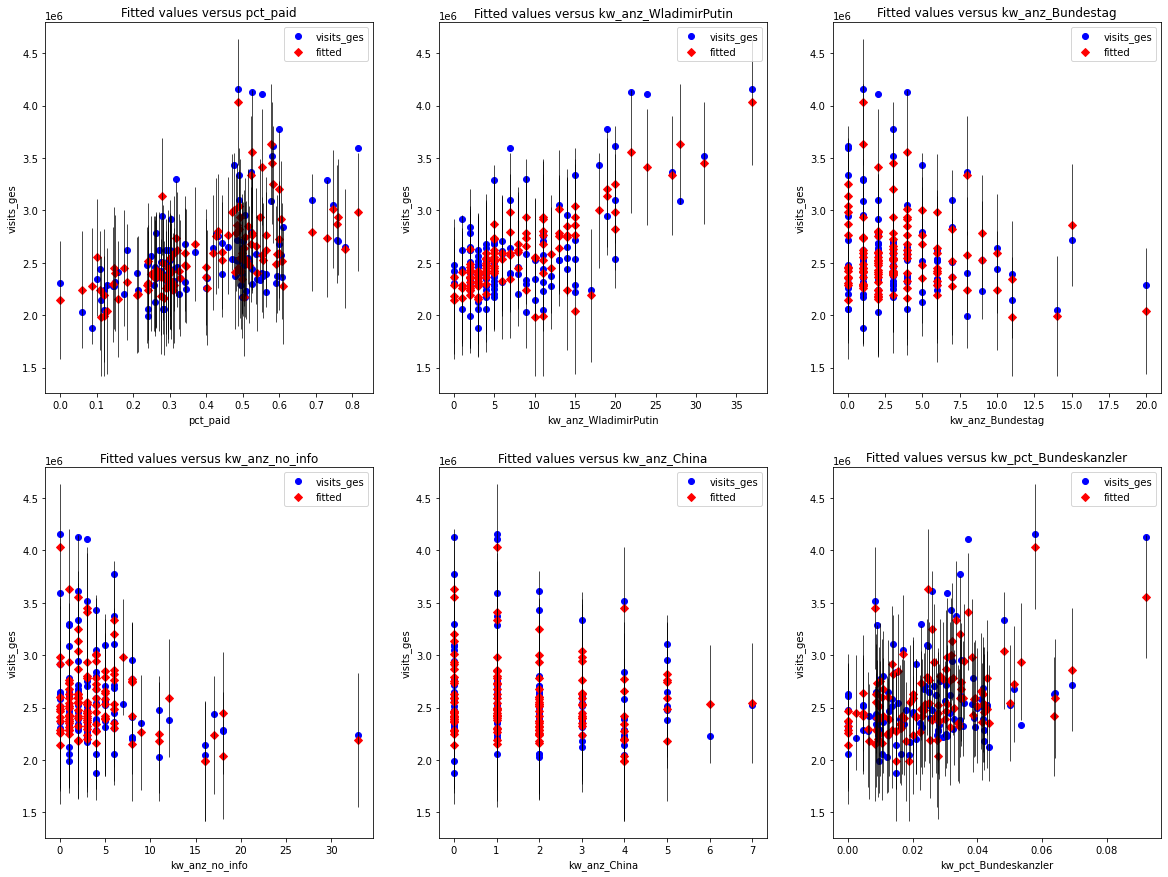

In [412]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))

sm.graphics.plot_fit(fit, 1, ax=ax[0, 0])
sm.graphics.plot_fit(fit, 2, ax=ax[0, 1])
sm.graphics.plot_fit(fit, 3, ax=ax[0, 2])
sm.graphics.plot_fit(fit, 4, ax=ax[1, 0])
sm.graphics.plot_fit(fit, 5, ax=ax[1, 1])
sm.graphics.plot_fit(fit, 6, ax=ax[1, 2])
plt.show();

In [ ]:
plt.figure(figsize=(100,100))
sns.pairplot(df_short);

In [ ]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(np.array(x).reshape(119,1),y)
    pred = rgr.predict(np.array(x).reshape(119,1))
    
    print(f'{x.name}')
    plt.subplot(1, 3, 1)
    plt.scatter(np.array(x).reshape(119,1),y)
    plt.plot(np.array(x).reshape(119,1), pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [ ]:
diagnostic_plot(X.iloc[:, 0], y)

kw_anz_WladimirPutin


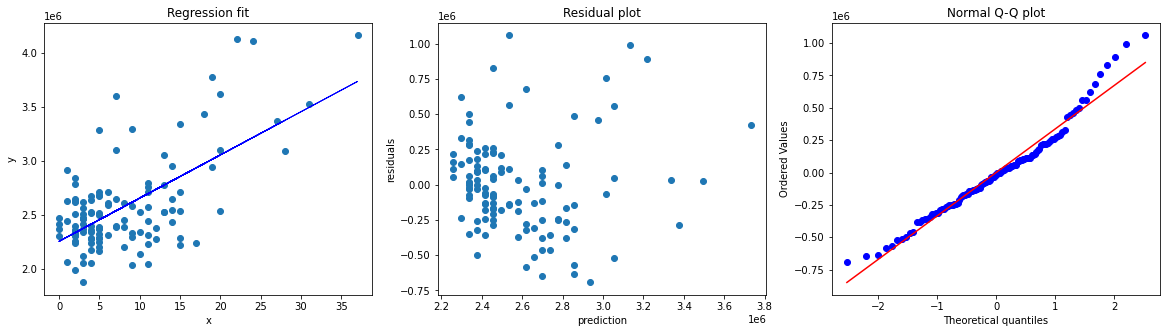

In [377]:
diagnostic_plot(X.iloc[:, 1], y)

kw_anz_Bundestag


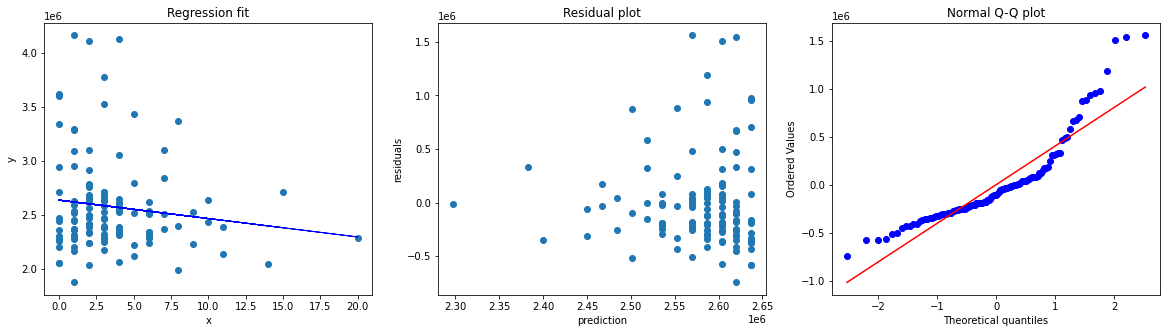

In [378]:
diagnostic_plot(X.iloc[:, 2], y)

kw_anz_no_info


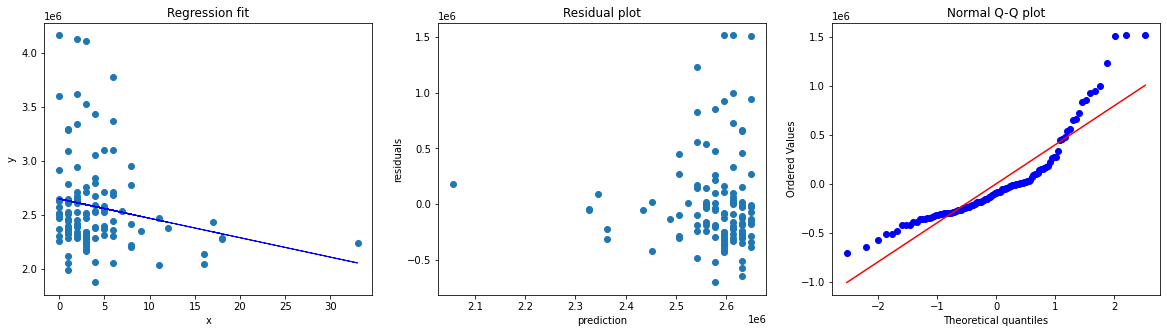

In [379]:
diagnostic_plot(X.iloc[:, 3], y)

kw_anz_China


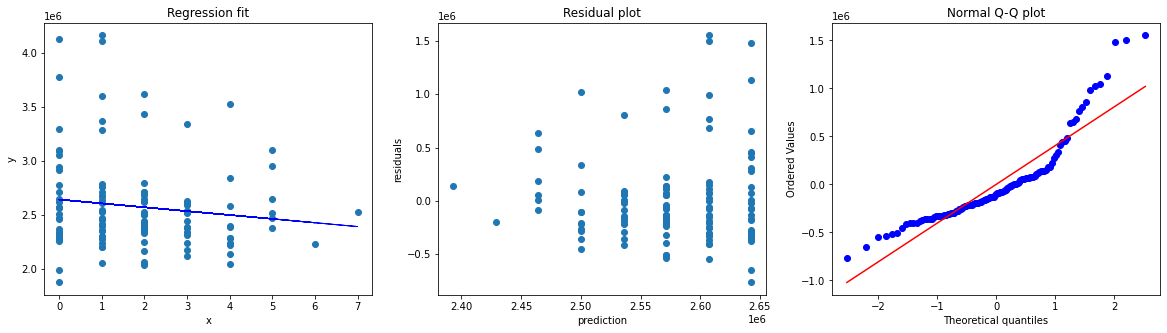

In [380]:
diagnostic_plot(X.iloc[:, 4], y)

kw_pct_Bundeskanzler


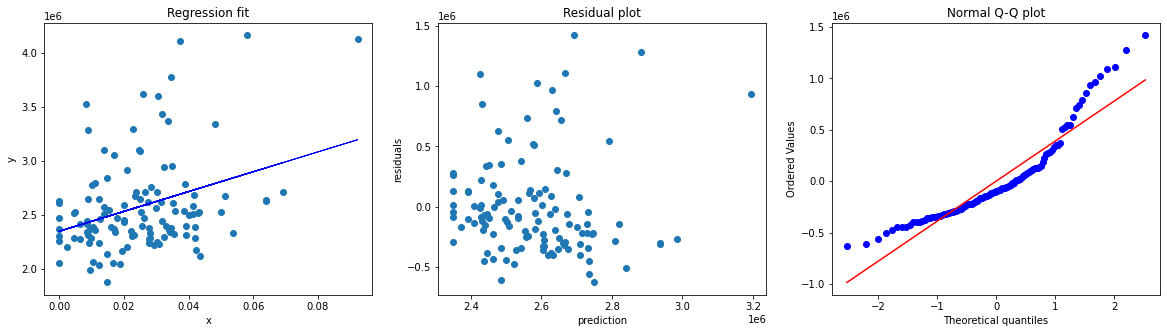

In [381]:
diagnostic_plot(X.iloc[:, 5], y)

### Assumption 2: Multicollinearity - no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity) 

- No VIF above 5, so considered OK

In [383]:
df_short.corr()

,visits_ges,pct_paid,kw_anz_WladimirPutin,kw_anz_Bundestag,kw_anz_no_info,kw_anz_China,kw_pct_Bundeskanzler
visits_ges,1.000000,0.481039,0.634429,-0.129396,-0.189211,-0.129281,0.341002
pct_paid,0.481039,1.000000,0.280709,-0.060510,-0.233377,0.124645,0.216615
kw_anz_WladimirPutin,0.634429,0.280709,1.000000,0.170752,0.241283,0.107027,0.284791
kw_anz_Bundestag,-0.129396,-0.060510,0.170752,1.000000,0.377412,0.271708,0.221329
kw_anz_no_info,-0.189211,-0.233377,0.241283,0.377412,1.000000,0.178994,0.013295
kw_anz_China,-0.129281,0.124645,0.107027,0.271708,0.178994,1.000000,-0.018368
kw_pct_Bundeskanzler,0.341002,0.216615,0.284791,0.221329,0.013295,-0.018368,1.000000


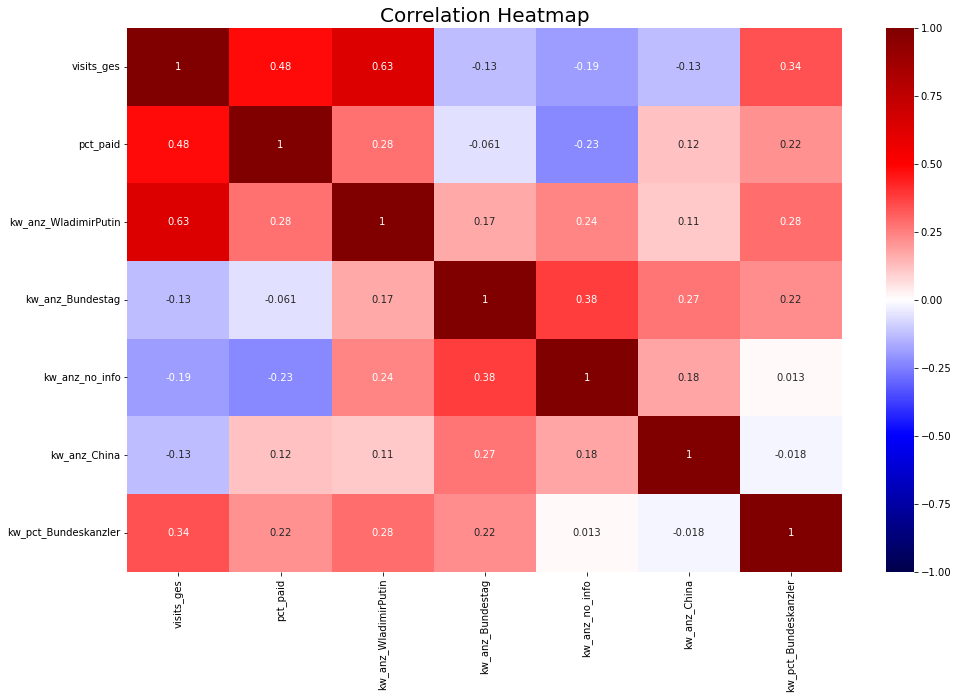

In [384]:
plt.figure(figsize = (16,10))
sns.heatmap(df_short.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20);

In [385]:
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif_table = pd.DataFrame(vif, list(X.columns))
# vif_table.columns = ['features', 'vif']
vif_table = vif_table.reset_index()
vif_table.columns = ['features', 'vif']
vif_table

,features,vif
0,pct_paid,4.458554
1,kw_anz_WladimirPutin,3.013087
2,kw_anz_Bundestag,2.749357
3,kw_anz_no_info,2.136677
4,kw_anz_China,2.585096
5,kw_pct_Bundeskanzler,3.670158


### Assumption 3: Residuals should be normally distributed with zero mean

- Diagonal pattern in the residuals: target is a count of visits, which is not continuous: 
- It cannot be negative and must be an integer since it is count data! 
- There is not a truly linear relationship between features and target!
- Therefore, the assumption that errors are normally distributed can't be held.
- Poisson Regression may be better option, so target (and features) are log-normlized later!

- Jarque-Bera (JB) Test: Tests if residuals are normally distributed (low p-value / high JB = non-normality of errors)

In [386]:
df_short.describe()

,visits_ges,pct_paid,kw_anz_WladimirPutin,kw_anz_Bundestag,kw_anz_no_info,kw_anz_China,kw_pct_Bundeskanzler
count,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,2.577776e+06,0.400316,8.033613,3.504202,3.991597,1.823529,0.024884
std,4.369944e+05,0.173760,6.942784,3.323960,4.603786,1.581927,0.016240
min,1.876515e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.314564e+06,0.277943,3.000000,1.000000,1.000000,1.000000,0.012300
50%,2.474623e+06,0.419753,5.000000,3.000000,3.000000,2.000000,0.024590
75%,2.678686e+06,0.521755,11.000000,4.500000,5.000000,3.000000,0.034431
max,4.160427e+06,0.816327,37.000000,20.000000,33.000000,7.000000,0.092199


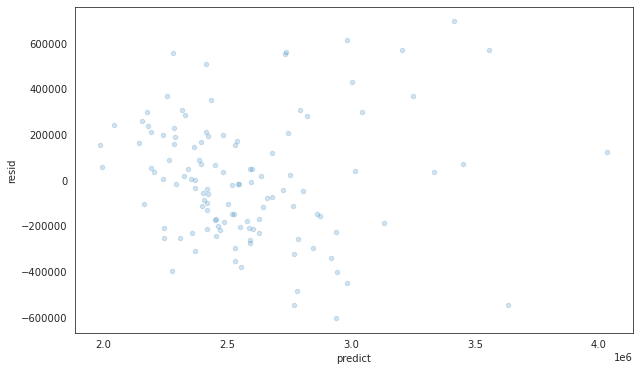

In [389]:
data = pd.DataFrame(columns=['predict', 'resid'])

data['predict'] = lr.predict(X)
data['resid'] = y - data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

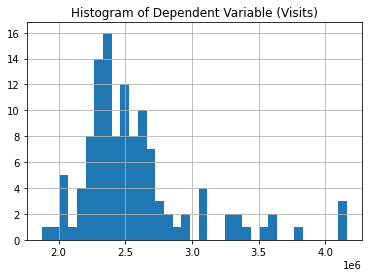

In [392]:
# inspect histogram
df_short['visits_ges'].hist(bins=35)
plt.title('Histogram of Dependent Variable (Visits)');

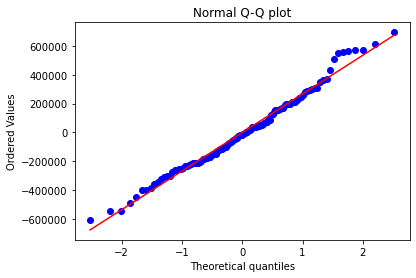

In [393]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(data['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

''

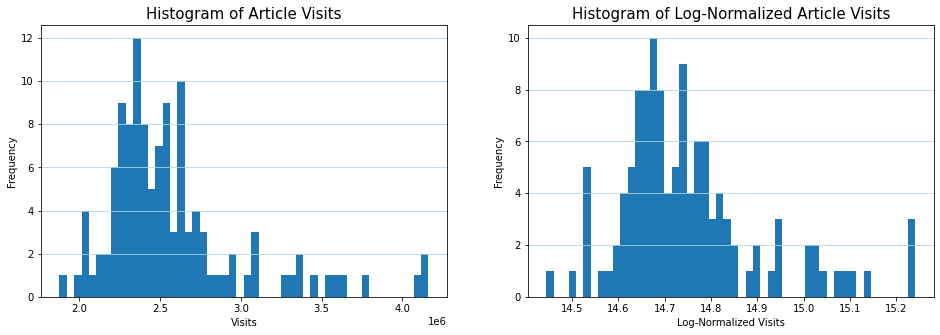

In [395]:
#Check: Normal distribution for visits
# visits_short['log_visits_norm'] = np.log(visits_short['visits_norm'])

fig = plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
df_short['visits_ges'].hist(bins=50)
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Article Visits', fontsize=15)
plt.grid(False)
plt.grid(color='lightblue', axis='y')

plt.subplot(1, 2, 2)
np.log(df_short['visits_ges']).hist(bins=50)
plt.xlabel('Log-Normalized Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Normalized Article Visits', fontsize=15)
plt.grid(False)
plt.grid(color='lightblue', axis='y')
;

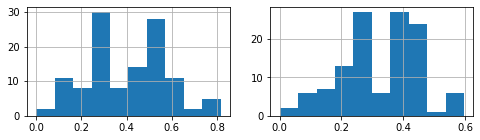

In [397]:
#Check: Normal distribution for pct_paid

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['pct_paid'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['pct_paid']+1).hist();

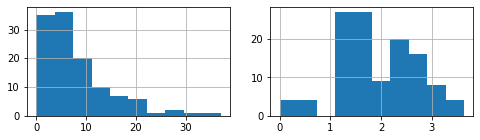

In [398]:
#Check: Normal distribution for keyword=Wladimir Putin

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['kw_anz_WladimirPutin'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['kw_anz_WladimirPutin']+1).hist();

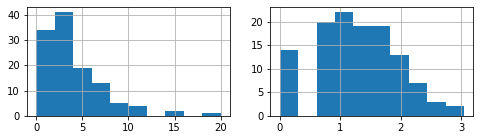

In [399]:
#Check: Normal distribution for keyword=Bundestag

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['kw_anz_Bundestag'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['kw_anz_Bundestag']+1).hist();

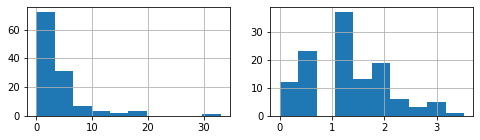

In [400]:
#Check: Normal distribution for keyword=no_info

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['kw_anz_no_info'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['kw_anz_no_info']+1).hist();

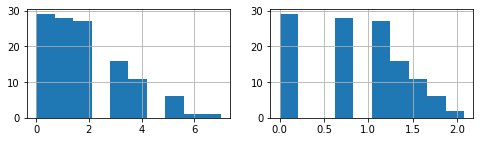

In [403]:
#Check: Normal distribution for keyword=China

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['kw_anz_China'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['kw_anz_China']+1).hist();

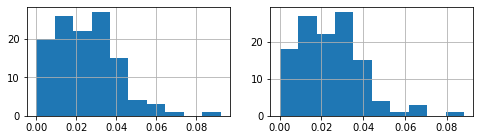

In [404]:
#Check: Normal distribution for keyword= percentage share "Bundeskanzler"

fig = plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
df_short['kw_pct_Bundeskanzler'].hist()

plt.subplot(1, 2, 2)
np.log(df_short['kw_pct_Bundeskanzler']+1).hist();

### Assumption 4: Autocorrelation - errors are uncorrelated across observations

- Can be tested by Durban-Watson test: Value between 1.5-2.5 is considered fine, slightly missed in this dataset

In [405]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             visits_ges   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     31.77
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.49e-22
Time:                        19:09:40   Log-Likelihood:                -1654.7
No. Observations:                 119   AIC:                             3323.
Df Residuals:                     112   BIC:                             3343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.144e+06    7.9e+04     27.159      0.000    1.99e+06     2.3e+06
pct_paid              6.028e+05   1.63e+05      3.688      0.000    2.79e+05    9.27e+05
kw_anz_WladimirPutin   3.87e+04   4104.197      9.429      0.000    3.06e+04    4.68e+04
kw_anz_Bundestag      -1.75e+04   8660.595     -2.021      0.046   -3.47e+04    -342.027
kw_anz_no_info       -1.961e+04   6369.786     -3.078      0.003   -3.22e+04   -6987.659
kw_anz_China         -4.121e+04   1.69e+04     -2.433      0.017   -7.48e+04   -7652.073
kw_pct_Bundeskanzler   3.86e+06   1.69e+06      2.290      0.024    5.21e+05     7.2e+06
==============================================================================
Omnibus:                        2.206   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                2.082
Skew:                           0.322   Prob(JB):                        0.353
Kurtosis:                       2.923   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption 5: Equal variance of errors (error terms w/ constant variance)

- Violation of assumption "homoscedasticity" as residuals increase with prediction
- However: rule of thumb is OLS regression isn't too impacted by heteroscedasticity as long as max variance is not greater than 4x min variance (height comparisons across x-axis).
- If residual variance exceeds this range, we can opt for a Weighted Least Squares (WLS) model.

In [406]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X, y)

0.6298904253678634

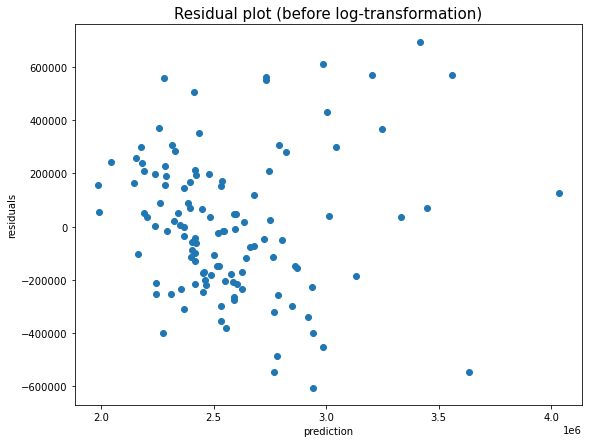

In [407]:
rgr = LinearRegression()
rgr.fit(X,y)
pred = rgr.predict(X)

fig = plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
res = y - pred
plt.scatter(pred, res)
plt.title("Residual plot (before log-transformation)", fontsize=15)
plt.xlabel("prediction")
plt.ylabel("residuals");

# Log-transform variables to decrease problem of non-normality of errors

Log-transform variables with continuous numbers of count-data.

In [499]:
df_short['log_visits_ges'] = np.log(df_short['visits_ges'])
df_short['log_pct_paid'] = np.log(df_short['pct_paid']+1)
df_short['log_kw_anz_WladimirPutin'] = np.log(df_short['kw_anz_WladimirPutin']+1)
df_short['log_kw_anz_Bundestag'] = np.log(df_short['kw_anz_Bundestag']+1)
df_short['log_kw_anz_no_info'] = np.log(df_short['kw_anz_no_info']+1)
df_short['log_kw_anz_China'] = np.log(df_short['kw_anz_China']+1)
df_short['log_kw_pct_Bundeskanzler'] = np.log(df_short['kw_pct_Bundeskanzler']+1)

/tmp/ipykernel_22090/1045814847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['log_visits_ges'] = np.log(df_short['visits_ges'])
/tmp/ipykernel_22090/1045814847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['log_pct_paid'] = np.log(df_short['pct_paid']+1)
/tmp/ipykernel_22090/1045814847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

# Model selection: Visit-Prediction (excl. social shares & comments)

Goal of the model is to predict Visits of individual articles. Since social shares and reader comments are only available after article publication, both features are not included.

The best model is selected among following algorithms:
- Basic Linear Regression
- Lasso Regression
- Ridge Regression
- Elastic Net
- Polynomial Regression
- Random Forest
- Gradient Boosting

In [611]:
target = df_short[['log_visits_ges']]

In [612]:
data = df_short[[
#         'pct_paid',
        'kw_anz_WladimirPutin',
        'kw_anz_Bundestag',
        'kw_anz_no_info',
        'kw_anz_China',
        'kw_pct_Bundeskanzler',
        'log_pct_paid',
#         'log_kw_anz_WladimirPutin',
#         'log_kw_anz_Bundestag',
#         'log_kw_anz_no_info',
#         'log_kw_anz_China',
#         'log_kw_pct_Bundeskanzler'
]]

In [613]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=5)

In [614]:
# Notice that we are splitting the X_train data into 5 Folds

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [615]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
r2_score_temp = np.mean(scores)
print(scores)
print("Linear Reg Mean Score: ", r2_score_temp)

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.02409108  0.6140301  -0.16523583  0.44899793  0.33943442  0.70124485
  0.59227054  0.59390763  0.46638661  0.65313194]
Linear Reg Mean Score:  0.42682592610258574


LinearRegression()

In [616]:
# Make predictions on the test set using the new model
test_set_pred = lin_reg_est.predict(X_test)

In [617]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [618]:
# Find the MAE and R^2 on the test set using this model
mae_lr = mae(np.array(y_test), test_set_pred)
mae_lr

0.10489053413435852

In [619]:
rmse_lr = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_lr

0.12413113329882987

In [620]:
r2_score_lr = r2_score(y_test, test_set_pred)
r2_score_lr

0.6279638693160261

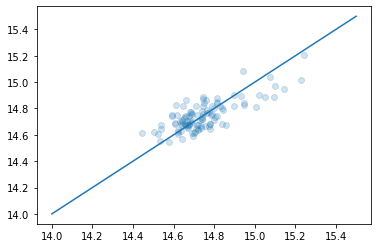

In [621]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([14, 15.5], [14, 15.5]);

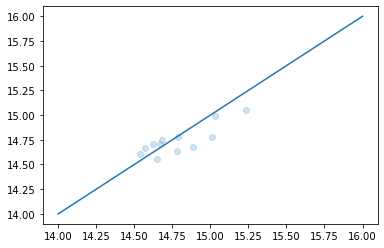

In [622]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_test)

plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([14, 16], [14, 16]);

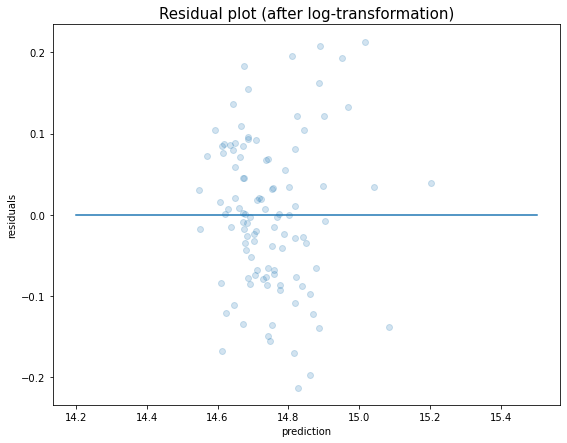

In [623]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

fig = plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)

plt.scatter(y_train_pred, lin_reg_residuals, alpha=0.2)
plt.plot([14.2,15.5], [0, 0])
plt.title("Residual plot (after log-transformation)", fontsize=15)
plt.xlabel("prediction")
plt.ylabel("residuals");

### b) Lasso regression (target = visits, excl. social shares & comments)

In [624]:
data.describe()

,kw_anz_WladimirPutin,kw_anz_Bundestag,kw_anz_no_info,kw_anz_China,kw_pct_Bundeskanzler,log_pct_paid
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,8.033613,3.504202,3.991597,1.823529,0.024884,0.328947
std,6.942784,3.323960,4.603786,1.581927,0.016240,0.125648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,0.012300,0.245251
50%,5.000000,3.000000,3.000000,2.000000,0.024590,0.350483
75%,11.000000,4.500000,5.000000,3.000000,0.034431,0.419864
max,37.000000,20.000000,33.000000,7.000000,0.092199,0.596816


In [625]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [626]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [627]:
pd.DataFrame(X_tr).describe()

,0,1,2,3,4,5
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,-4.461644e-17,-1.867665e-17,-5.706754e-17,-2.593979e-17,4.833880e-16,-4.513524e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-1.219767e+00,-1.032214e+00,-8.829316e-01,-1.175137e+00,-1.643860e+00,-2.193940e+00
25%,-7.727976e-01,-7.392517e-01,-6.725225e-01,-5.495667e-01,-8.255079e-01,-6.975967e-01
50%,-3.258282e-01,-1.533263e-01,-2.517043e-01,7.600390e-02,5.058495e-03,2.105346e-01
75%,4.191209e-01,2.861178e-01,1.691138e-01,7.015745e-01,6.519356e-01,7.014579e-01
max,4.292856e+00,4.827040e+00,6.060568e+00,3.203857e+00,2.947414e+00,2.168108e+00


In [628]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,100)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05480231e-0...
       1.17681195e+01, 1.29154967e+01, 1.41747416e+01, 1.55567614e+01,
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
        cv=5)

In [629]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

In [630]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('kw_anz_WladimirPutin', 0.06995327732201233),
 ('kw_anz_Bundestag', -0.00961798763900642),
 ('kw_anz_no_info', -0.019835311435257037),
 ('kw_anz_China', -0.007100513460230711),
 ('kw_pct_Bundeskanzler', 0.0082254491257048),
 ('log_pct_paid', 0.042496970044510966)]

In [631]:
y_sm, X_sm = patsy.dmatrices('log_visits_ges ~ kw_anz_WladimirPutin + kw_anz_Bundestag + kw_anz_no_info + kw_anz_China + kw_pct_Bundeskanzler + log_pct_paid', data=df_short, return_type="dataframe")

In [632]:
X2 = sm.add_constant(X_sm)
est = sm.OLS(y_sm, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         log_visits_ges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     29.30
Date:                Sat, 14 May 2022   Prob (F-statistic):           7.00e-21
Time:                        20:02:27   Log-Likelihood:                 110.84
No. Observations:                 119   AIC:                            -207.7
Df Residuals:                     112   BIC:                            -188.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.5790 

In [633]:
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]

vif_table = pd.DataFrame(vif, list(data.columns))
# vif_table.columns = ['features', 'vif']
vif_table = vif_table.reset_index()
vif_table.columns = ['features', 'vif']
vif_table

,features,vif
0,kw_anz_WladimirPutin,3.000930
1,kw_anz_Bundestag,2.749624
2,kw_anz_no_info,2.131610
3,kw_anz_China,2.638719
4,kw_pct_Bundeskanzler,3.803394
5,log_pct_paid,4.868419


In [634]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [635]:
# Find the MAE and R^2 on the test set using this model
mae_lasso = mae(np.array(y_test), test_set_pred)
mae_lasso

0.1857991612174309

In [636]:
rmse_lasso = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_lasso

0.13974363894032263

In [637]:
r2_score_lasso = r2_score(y_test, test_set_pred)
r2_score_lasso

0.528493402117284

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


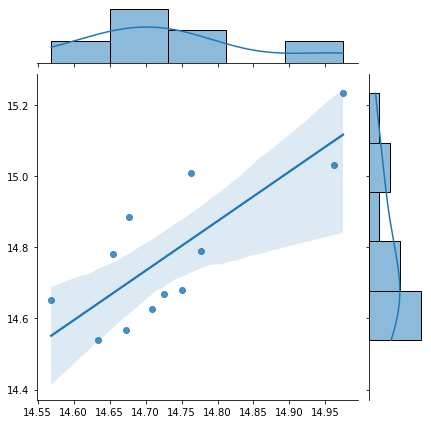

In [638]:
sns.jointplot(test_set_pred, y_test.values.ravel(), kind='reg');

### c) Ridge regression (target = visits, excl. social shares & comments)

In [639]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [640]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
ridge_model.alpha_

11.357333583431052

In [641]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, ridge_model.coef_[0]))

[('kw_anz_WladimirPutin', 0.0728384778433016),
 ('kw_anz_Bundestag', -0.016705268267795965),
 ('kw_anz_no_info', -0.023839055746864898),
 ('kw_anz_China', -0.013666441043378283),
 ('kw_pct_Bundeskanzler', 0.016972326259754106),
 ('log_pct_paid', 0.04407240639437492)]

In [642]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [643]:
# Find the MAE and R^2 on the test set using this model
mae_ridge = mae(np.array(y_test), test_set_pred)
mae_ridge

0.11009360061765205

In [644]:
rmse_ridge = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_ridge

0.1284750333161252

In [645]:
r2_score_ridge = r2_score(y_test, test_set_pred)
r2_score_ridge

0.6014698745028939

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


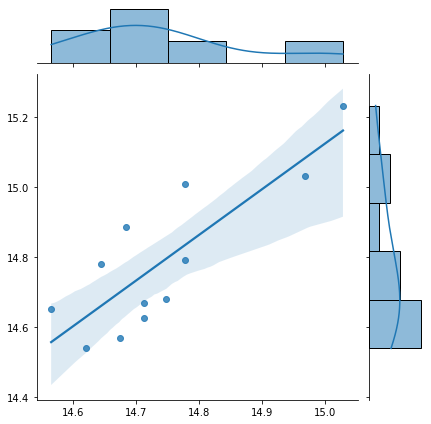

In [646]:
sns.jointplot(test_set_pred.ravel(), y_test.values.ravel(), kind='reg');

### d) Elastic net (target = visits, excl. social shares & comments)

In [647]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)
ratio = np.linspace(0, 1, 20)

en_model = ElasticNetCV(alphas = alphavec, l1_ratio=ratio, cv=5)
en_model.fit(X_tr, y_train)

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9086619190614648, tolerance: 0.00018327353294100016
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7872880456398347, tolerance: 0.0001875573190963873
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7821815360347967, tolerance: 0.0001875573190963873
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44853577616251095, tolerance: 0.0001878046095713344
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44614434250780605, tolerance: 0.0001878046095713344
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/sit

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8493138682572373, tolerance: 0.00017182044478245462
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8488595639742272, tolerance: 0.00017182044478245462
  model = cd_fast.enet_coordinate_descent_gram(
/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/sit

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.095e-01, tolerance: 2.262e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNetCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.643081...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
             cv=5,
             l1_ratio=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]))

In [648]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
en_model.alpha_

0.10595601792776159

In [649]:
en_model.l1_ratio_

0.0

In [650]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, en_model.coef_))

[('kw_anz_WladimirPutin', 0.0728516243510707),
 ('kw_anz_Bundestag', -0.016707052989867906),
 ('kw_anz_no_info', -0.023843840860200496),
 ('kw_anz_China', -0.013669679066930696),
 ('kw_pct_Bundeskanzler', 0.01697251227976322),
 ('log_pct_paid', 0.04407564140962134)]

In [651]:
# Make predictions on the test set using the new model
test_set_pred = en_model.predict(X_te)

In [652]:
# Find the MAE and R^2 on the test set using this model
mae_en = mae(np.array(y_test), test_set_pred)
mae_en

0.1898145873542615

In [653]:
rmse_en = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_en

0.12846770754547532

In [654]:
r2_score_en = r2_score(y_test, test_set_pred)
r2_score_en

0.6015153223534777

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


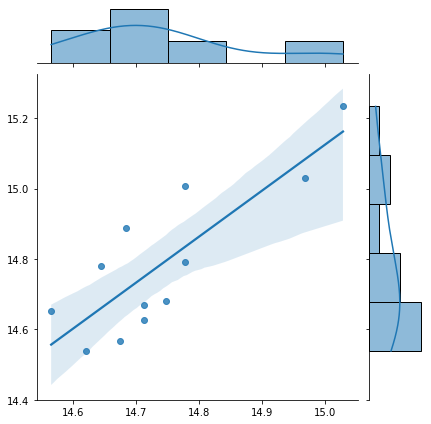

In [655]:
sns.jointplot(test_set_pred, y_test.values.ravel(), kind='reg');

### e) Polynomial regression (target = visits, excl. social shares & comments) 

In [656]:
lm_poly = LinearRegression()
poly = PolynomialFeatures()

scores_poly = cross_val_score(lm_poly, poly.fit_transform(X_train), y_train, cv=kfold)
r2_score_temp = np.mean(scores_poly)
print(scores_poly)
print("Polynomial Reg Mean Score: ", r2_score_temp)

# Build the Model
lm_poly.fit(poly.fit_transform(X_train), y_train)

[-1.01249255  0.62541926 -0.23637598  0.19027928 -2.28463842  0.55582055
  0.19950675 -0.15234885 -0.45980263  0.35515825]
Polynomial Reg Mean Score:  -0.22194743435983852


LinearRegression()

In [657]:
# Make predictions on the test set using the new model
test_set_pred = lm_poly.predict(poly.transform(X_test))

In [658]:
# Find the MAE and R^2 on the test set using this model
mae_poly = mae(np.array(y_test), test_set_pred)
mae_poly

0.10504835021793173

In [659]:
rmse_poly = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_poly

0.128062673759121

In [660]:
r2_score_poly = r2_score(y_test, test_set_pred)
r2_score_poly

0.6040240512751773

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


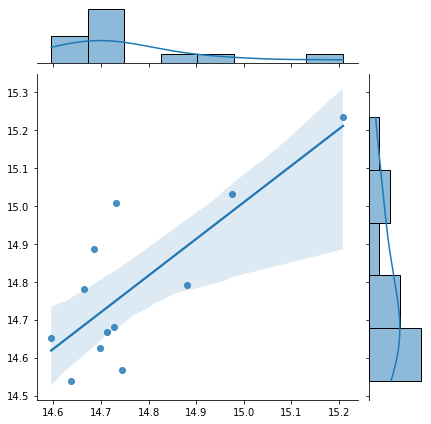

In [661]:
sns.jointplot(test_set_pred.ravel(), y_test.values.ravel(), kind='reg');

### f) Random forest regressor (target = visits, excl. social shares & comments)

In [662]:
rf = RandomForestRegressor(n_estimators=2000, max_features=5, max_depth=10)
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=kfold)
print(scores)
print("Random Forest Regression: ", np.mean(scores))

rf.fit(X_train, y_train.values.ravel())

[0.21922584 0.72006577 0.25495686 0.03907612 0.24035721 0.70115156
 0.69004344 0.4881329  0.07443948 0.60854818]
Random Forest Regression:  0.40359973639551805


RandomForestRegressor(max_depth=10, max_features=5, n_estimators=2000)

In [663]:
test_set_pred = rf.predict(X_test)

In [664]:
mae_rf = mae(np.array(y_test), test_set_pred)
mae_rf

0.19636475150095936

In [665]:
rmse_rf = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_rf

0.1381353683150238

In [666]:
r2_score_rf = r2_score(y_test, test_set_pred)
r2_score_rf

0.539283827015375

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


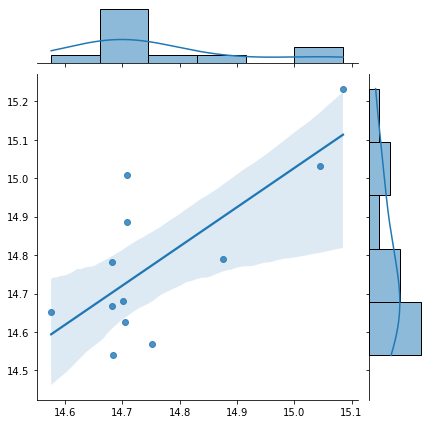

In [667]:
sns.jointplot(test_set_pred, y_test.values.ravel(), kind='reg');

### g) Gradient boosting regressor (target = visits, excl. social shares & comments)

In [668]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=7, learning_rate=.01)
scores = cross_val_score(gbm, X_train, y_train.values.ravel(), cv=kfold)
print(scores)
print("Gradient Boosted Regression: ", np.mean(scores))

[ 0.08531616  0.58634375  0.05108888 -1.08061197 -0.02653183  0.87105238
  0.76330771  0.6034312  -0.06657078  0.50506072]
Gradient Boosted Regression:  0.2291886205086675


In [669]:
gbm.fit(X_train, y_train.values.ravel())
test_set_pred = gbm.predict(X_test)

In [670]:
mae_gbm = mae(np.array(y_test), test_set_pred)
mae_gbm

0.21433302032226378

In [671]:
rmse_gbm = mean_squared_error(np.array(y_test), test_set_pred, squared=False)
rmse_gbm

0.14352204912036384

In [672]:
r2_score_gbm = r2_score(y_test, test_set_pred)
r2_score_gbm

0.5026513646187463

/media/fabian/VM_space/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

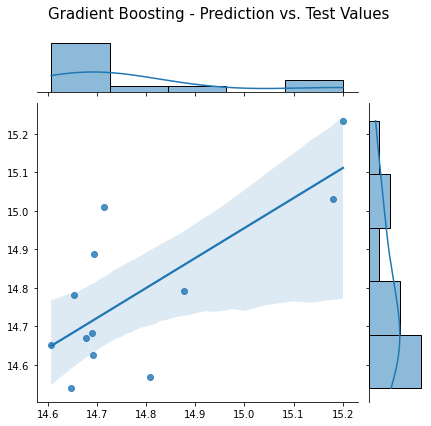

In [673]:
p = sns.jointplot(test_set_pred, y_test.values.ravel(), kind='reg')
p.fig.suptitle("Gradient Boosting - Prediction vs. Test Values", fontsize=15)
p.fig.subplots_adjust(top=0.9)
;

### Comparison of results of the 7 models (target = visits, excl. social shares & comments)

In [674]:
print(f'Linear Regression Mean Average Error (MAE): {mae_lr:.4f}')
print(f'Linear Regression Root Mean Squared Error (RMSE): {rmse_lr:.4f}')
print(f'Linear Regression R2 Score (R2): {r2_score_lr:.4f}\n')

print(f'Lasso MAE: {mae_lasso:.4f}')
print(f'Lasso RMSE: {rmse_lasso:.4f}')
print(f'Lasso R2: {r2_score_lasso:.4f}\n')

print(f'Ridge MAE: {mae_ridge:.4f}')
print(f'Ridge RMSE: {rmse_ridge:.4f}')
print(f'Ridge R2: {r2_score_ridge:.4f}\n')

print(f'ElasticNet MAE: {mae_en:.4f}')
print(f'ElasticNet RMSE: {rmse_en:.4f}')
print(f'ElasticNet R2: {r2_score_en:.4f}\n')

print(f'Polynomial MAE: {mae_poly:.4f}')
print(f'Polynomial RMSE: {rmse_poly:.4f}')
print(f'Polynomial R2: {r2_score_poly:.4f}\n')

print(f'Random Forest Regressor MAE: {mae_rf:.4f}')
print(f'Random Forest Regressor RMSE: {rmse_rf:.4f}')
print(f'Random Forest Regressor R2: {r2_score_rf:.4f}\n')

print(f'Gradient Boosting MAE: {mae_gbm:.4f}')
print(f'Gradient Boosting RMSE: {rmse_gbm:.4f}')
print(f'Gradient Boosting R2: {r2_score_gbm:.4f}\n')

Linear Regression Mean Average Error (MAE): 0.1049
Linear Regression Root Mean Squared Error (RMSE): 0.1241
Linear Regression R2 Score (R2): 0.6280

Lasso MAE: 0.1858
Lasso RMSE: 0.1397
Lasso R2: 0.5285

Ridge MAE: 0.1101
Ridge RMSE: 0.1285
Ridge R2: 0.6015

ElasticNet MAE: 0.1898
ElasticNet RMSE: 0.1285
ElasticNet R2: 0.6015

Polynomial MAE: 0.1050
Polynomial RMSE: 0.1281
Polynomial R2: 0.6040

Random Forest Regressor MAE: 0.1964
Random Forest Regressor RMSE: 0.1381
Random Forest Regressor R2: 0.5393

Gradient Boosting MAE: 0.2143
Gradient Boosting RMSE: 0.1435
Gradient Boosting R2: 0.5027

